In [398]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [399]:
df=pd.read_csv('accidents.csv')
df.head()

,Severity,StartTime,EndTime,StartLat,StartLng,Distance,Street,City,State,Zipcode,...,Crossing,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal
0,2,2019-07-22 14:43:06,2019-07-22 16:22:19,34.789009,-82.483383,0.000,Highway 153,Greenville,SC,29611,...,False,False,False,False,False,False,False,False,False,False
1,2,2019-03-20 16:12:14,2019-03-20 16:41:05,40.998264,-76.650396,0.472,Continental Blvd,Danville,PA,17821,...,False,False,False,False,False,False,False,False,False,False
2,3,2018-12-12 14:19:18,2018-12-12 14:48:56,33.461292,-112.082001,0.000,I-10 W,Phoenix,AZ,85003,...,False,False,False,False,False,False,False,False,False,False
3,2,2018-03-09 08:02:11,2018-03-09 08:49:15,42.288445,-87.924911,0.000,Oak Spring Rd,Libertyville,IL,60048,...,False,False,False,False,False,False,False,False,False,False
4,2,2020-03-27 05:36:56,2020-03-27 06:36:48,36.229259,-86.594650,0.000,Saundersville Rd,Old Hickory,TN,37138,...,False,False,False,False,False,False,False,False,False,False


In [400]:
lat=df['StartLat'].values
lon=df['StartLng'].values
location=df[['StartLat','StartLng']].values

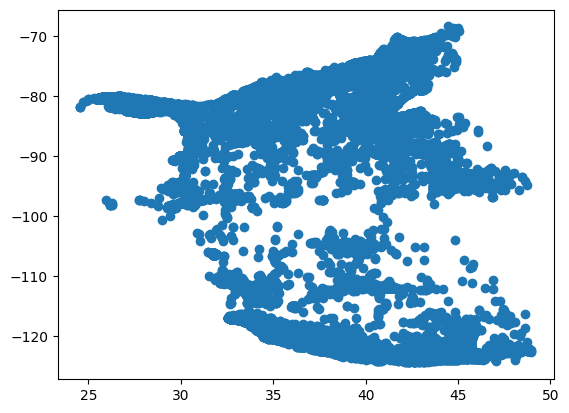

In [401]:
plt.scatter(lat,lon)

In [402]:
def distance(x,y):
    return np.sqrt(np.sum((x - y) ** 2,axis=1))


In [403]:
def initialize(data,K):
    indices = np.random.choice(len(data), K, replace=False)
    return data[indices]

In [404]:
def compute_clusters(data,centroids):
    clusters = {i: [] for i in range(len(centroids))}
    for point in data:
        clusters[np.argmin(distance(point,centroids))].append(point)
    return clusters

In [405]:
def update_centroids(clusters,K,dim):
    centroids=np.zeros((K, dim))
    for id in range(K):
        if len(clusters[id])>0:
            centroids[id]=np.mean(clusters[id],axis=0)       
    return centroids

In [406]:
def kmeans(K,epoch,location):
    dim=location.shape[1]
    centroids=initialize(location,K)
    for iter in range(epoch):
        clusters=compute_clusters(location,centroids)
        centroids=update_centroids(clusters,K,dim)
    return clusters,centroids


In [407]:
K=5
epoch=10
clusters,centroids=kmeans(K,epoch,location)

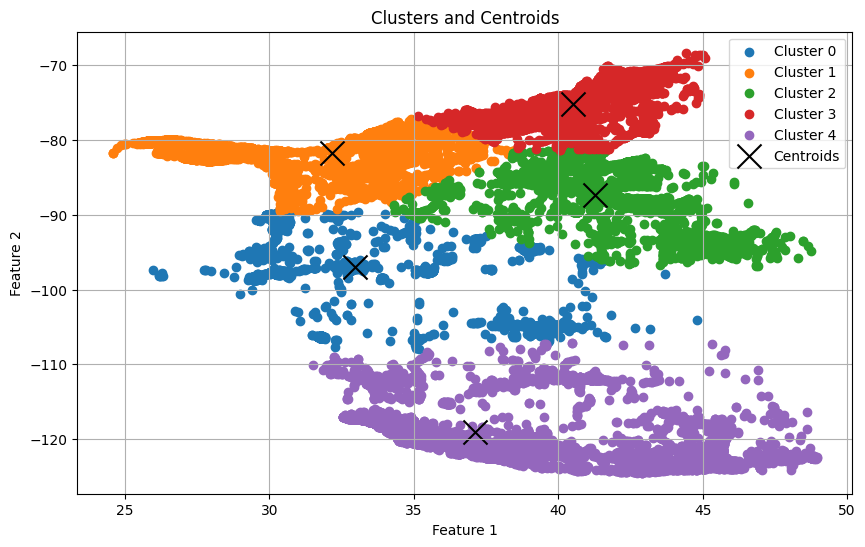

In [408]:
plt.figure(figsize=(10, 6))

for i in clusters:
    cluster_points = np.array(clusters[i])
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')

centroids_np = np.array(centroids)
plt.scatter(centroids_np[:, 0], centroids_np[:, 1], s=300, c='black', marker='x', label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters and Centroids')
plt.legend()
plt.grid(True)
plt.show()
